In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional 


In [26]:
import urllib3
import requests
from bs4 import BeautifulSoup

file = "/Users/franciscobetancourt/Downloads/sonnet_view.txt"

with open(file) as f:
    data = f.read()

soup = BeautifulSoup(data, 'html.parser')
texts = soup.findAll('p')
print(texts)


[<p align="center" class="normalsans"><strong>The text you requested is loading.<br/>
			   This shouldn't take more than a minute, depending on <br/>
			   the speed of your Internet connection.
	</strong></p>, <p align="center"><img alt="progress graphic" border="0" height="13" src="/images/progress_graphic.gif" width="137"/></p>, <p class="normalsans" style="font: 11px; margin-left: 80px; margin-right: 80px;">The heaven's breath<br/>Smells wooingly here: no jutty, frieze,<br/>Buttress, nor coign of vantage, but this bird<br/>Hath made his pendent bed and procreant cradle:<br/>Where they most breed and haunt, I have observed,<br/>The air is delicate.<br/><br/>      — <i>Macbeth</i>, Act I Scene 6</p>, <p><a href="/"><img alt="Open Source Shakespeare" border="0" height="45" src="/images/oss-whitelogo.gif" width="281"/></a><br/>
</p>, <p class="sonnettitle">SONNET 1<br/>
<p class="normalsans">From fairest creatures we desire increase,<br/>
That thereby beauty's rose might never die,<br

In [36]:
for string in soup.stripped_strings:
    print(repr(string))

'View Shakespeare sonnets (OpenSourceShakespeare.org)'
'Please wait'
'The text you requested is loading.'
"This shouldn't take more than a minute, depending on"
'the speed of your Internet connection.'
"The heaven's breath"
'Smells wooingly here: no jutty, frieze,'
'Buttress, nor coign of vantage, but this bird'
'Hath made his pendent bed and procreant cradle:'
'Where they most breed and haunt, I have observed,'
'The air is delicate.'
'—'
'Macbeth'
', Act I Scene 6'
'View sonnets'
'SONNET 1'
'From fairest creatures we desire increase,'
"That thereby beauty's rose might never die,"
'But as the riper should by time decease,'
'His tender heir might bear his memory:'
'But thou, contracted to thine own bright eyes,'
'5'
"Feed'st thy light'st flame with self-substantial fuel,"
'Making a famine where abundance lies,'
'Thyself thy foe, to thy sweet self too cruel.'
"Thou that art now the world's fresh ornament"
'And only herald to the gaudy spring,'
'10'
'Within thine own bud buriest thy conte

In [37]:
texts = [string for string in soup.stripped_strings if len(string) > 12]
print(texts)

['View Shakespeare sonnets (OpenSourceShakespeare.org)', 'The text you requested is loading.', "This shouldn't take more than a minute, depending on", 'the speed of your Internet connection.', "The heaven's breath", 'Smells wooingly here: no jutty, frieze,', 'Buttress, nor coign of vantage, but this bird', 'Hath made his pendent bed and procreant cradle:', 'Where they most breed and haunt, I have observed,', 'The air is delicate.', ', Act I Scene 6', 'From fairest creatures we desire increase,', "That thereby beauty's rose might never die,", 'But as the riper should by time decease,', 'His tender heir might bear his memory:', 'But thou, contracted to thine own bright eyes,', "Feed'st thy light'st flame with self-substantial fuel,", 'Making a famine where abundance lies,', 'Thyself thy foe, to thy sweet self too cruel.', "Thou that art now the world's fresh ornament", 'And only herald to the gaudy spring,', 'Within thine own bud buriest thy content', 'And, tender churl, makest waste in 

In [38]:
for i in range(10):
    print(texts[i])

View Shakespeare sonnets (OpenSourceShakespeare.org)
The text you requested is loading.
This shouldn't take more than a minute, depending on
the speed of your Internet connection.
The heaven's breath
Smells wooingly here: no jutty, frieze,
Buttress, nor coign of vantage, but this bird
Hath made his pendent bed and procreant cradle:
Where they most breed and haunt, I have observed,
The air is delicate.


In [39]:
texts = texts[4:]

In [41]:
for i in range(25):
    print(texts[i])

The heaven's breath
Smells wooingly here: no jutty, frieze,
Buttress, nor coign of vantage, but this bird
Hath made his pendent bed and procreant cradle:
Where they most breed and haunt, I have observed,
The air is delicate.
, Act I Scene 6
From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou, contracted to thine own bright eyes,
Feed'st thy light'st flame with self-substantial fuel,
Making a famine where abundance lies,
Thyself thy foe, to thy sweet self too cruel.
Thou that art now the world's fresh ornament
And only herald to the gaudy spring,
Within thine own bud buriest thy content
And, tender churl, makest waste in niggarding.
Pity the world, or else this glutton be,
To eat the world's due, by the grave and thee.
When forty winters shall beseige thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery, so gazed on now,
Will be a tatter'

In [58]:
import re 
corpus = []
regex = re.compile(r'^((?! Act ).)*$')
for line in texts:
    if re.findall(regex, line):
        corpus.append(line.lower())
    
    

In [59]:
for i in range(25):
    print(corpus[i])

the heaven's breath
smells wooingly here: no jutty, frieze,
buttress, nor coign of vantage, but this bird
hath made his pendent bed and procreant cradle:
where they most breed and haunt, i have observed,
the air is delicate.
from fairest creatures we desire increase,
that thereby beauty's rose might never die,
but as the riper should by time decease,
his tender heir might bear his memory:
but thou, contracted to thine own bright eyes,
feed'st thy light'st flame with self-substantial fuel,
making a famine where abundance lies,
thyself thy foe, to thy sweet self too cruel.
thou that art now the world's fresh ornament
and only herald to the gaudy spring,
within thine own bud buriest thy content
and, tender churl, makest waste in niggarding.
pity the world, or else this glutton be,
to eat the world's due, by the grave and thee.
when forty winters shall beseige thy brow,
and dig deep trenches in thy beauty's field,
thy youth's proud livery, so gazed on now,
will be a tatter'd weed, of small

In [60]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [61]:
tokenizer.word_index

{'and': 1,
 'the': 2,
 'to': 3,
 'of': 4,
 'my': 5,
 'i': 6,
 'in': 7,
 'that': 8,
 'thy': 9,
 'thou': 10,
 'with': 11,
 'for': 12,
 'is': 13,
 'not': 14,
 'love': 15,
 'but': 16,
 'a': 17,
 'me': 18,
 'thee': 19,
 'so': 20,
 'be': 21,
 'as': 22,
 'all': 23,
 'you': 24,
 'his': 25,
 'which': 26,
 'when': 27,
 'this': 28,
 'it': 29,
 'by': 30,
 'your': 31,
 'doth': 32,
 'do': 33,
 'from': 34,
 'on': 35,
 'no': 36,
 'or': 37,
 'have': 38,
 'then': 39,
 'are': 40,
 'what': 41,
 'if': 42,
 'more': 43,
 'mine': 44,
 'their': 45,
 'shall': 46,
 'sweet': 47,
 'they': 48,
 'time': 49,
 'nor': 50,
 'will': 51,
 'beauty': 52,
 'eyes': 53,
 'art': 54,
 'her': 55,
 'heart': 56,
 'yet': 57,
 'o': 58,
 'than': 59,
 'can': 60,
 'hath': 61,
 'where': 62,
 'should': 63,
 'thine': 64,
 'now': 65,
 'make': 66,
 'one': 67,
 'he': 68,
 'fair': 69,
 'still': 70,
 'how': 71,
 'eye': 72,
 'him': 73,
 'like': 74,
 'true': 75,
 'see': 76,
 'am': 77,
 'she': 78,
 'those': 79,
 'though': 80,
 'being': 81,
 'some'

In [62]:
def n_grams(corpus, tokenizer):
    '''Returns a list of n-gram sequences '''
    input_sequences = []
    
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_seq = token_list[:i+1]
            input_sequences.append(n_gram_seq)
    return input_sequences

input_sequences = n_grams(corpus, tokenizer)
          
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding='pre'))
    
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
    
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)
        

In [63]:
sentence = corpus[0].split()
print(f'Sample: {sentence}')

token_list = []

for word in sentence:
    token_list.append(tokenizer.word_index[word])
    
print(token_list)

Sample: ['the', "heaven's", 'breath']
[2, 312, 278]


In [66]:
class PoeticModel(tf.keras.Model):
    
    def __init__(self, *args, **kwargs):
        super(PoeticModel, self).__init__(*args, **kwargs)
        self.loss_tracker = tf.keras.metrics.CategoricalCrossentropy(name='loss')
        self.embed = tf.keras.layers.Embedding(total_words,
                                               64,
                                               input_length = max_sequence_len -1)
        self.bidirectional = tf.keras.layers.Bidirectional(LSTM(20,
                                                           return_sequences = True))
        self.lstm2 = tf.keras.layers.LSTM(20)
        self.d1 = tf.keras.layers.Dense(total_words, activation='softmax')
        
    def call(self, inputs):
        x = self.embed(inputs)
        x = self.bidirectional(x)
        x = self.lstm2(x)
        return self.d1(x)

In [70]:
model = PoeticModel()

model.compile(loss='categorical_crossentropy', 
              optimizer = 'adam', 
              metrics=['accuracy'])

history = model.fit(xs, ys, epochs = 500)

Epoch 1/500
485/485 [==============================] - 16s 29ms/step - loss: 0.0000e+00 - accuracy: 0.0211
Epoch 2/500
485/485 [==============================] - 14s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0222
Epoch 3/500
485/485 [==============================] - 14s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0226
Epoch 4/500
485/485 [==============================] - 14s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0244
Epoch 5/500
485/485 [==============================] - 13s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0289
Epoch 6/500
485/485 [==============================] - 14s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0335
Epoch 7/500
485/485 [==============================] - 15s 30ms/step - loss: 0.0000e+00 - accuracy: 0.0354
Epoch 8/500
485/485 [==============================] - 14s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0369
Epoch 9/500
485/485 [==============================] - 14s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0389
Epoch 10/500
485/485 [===============

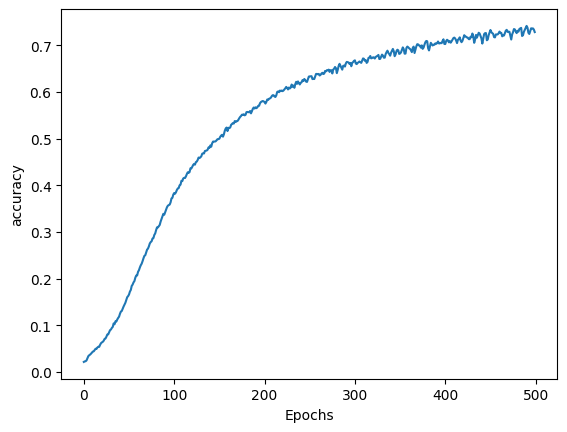

In [71]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'accuracy')

In [84]:

def poem_generator(seed_text, next_words, model = model):
    
    seed_text = seed_text

    next_words = next_words

    for _ in range(next_words):
        
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        
        token_list = pad_sequences([token_list], 
                                   maxlen = max_sequence_len -1, 
                                   padding='pre')
        
        probabilities = model.predict(token_list)
        
        choice = np.random.choice([1,2,3])
        
        predicted = np.argsort(probabilities, axis = -1)[0][-choice]
        
        if predicted != 0:
            
            output_word = tokenizer.index_word[predicted]
            
            seed_text += " " + output_word
            
    print(seed_text)
    return seed_text

In [79]:
len(seed_text)

655

In [83]:
def poem_formatter(seed_text, words_per_line):

    text_list = seed_text.split(" ")

    for i in range(len(text_list)):
        if i % words_per_line == 0:
            print("\n")
        print(text_list[i], end=" ")
    
        
        